<a href="https://colab.research.google.com/github/aslam7861/Machine_Learning_Project/blob/main/unsupervised_machinne_learnning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

In [18]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [24]:
data_set_5000=pd.read_csv('https://raw.githubusercontent.com/aslam7861/Machine_Learning_Project/main/df_audio_features_5000')

In [35]:
col= data_set_5000.columns
data_set_5000.columns=[a.split()[0] for a in col]



In [43]:
datas=data_set_5000

In [36]:
data_set_5000.columns

Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms', 'time_signature', 'id',
       'html'],
      dtype='object')

In [45]:
data_set_5000=data_set_5000[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

In [38]:
from math import pi

In [46]:
peng_cl_norm = MinMaxScaler().fit_transform(dd)#(data_set_5000)

In [47]:
# data_set_5000=pd.DataFrame(data_set_5000)[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

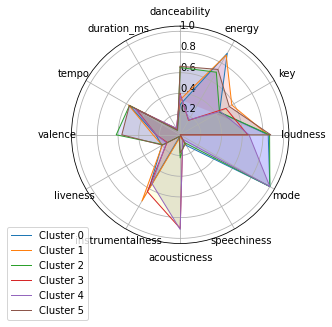

In [48]:
peng_cl_norm = MinMaxScaler().fit_transform(data_set_5000)
# Based on the quick look to the scatter plot, 
# we are going to assume there can be 3 different species.
kmeans = KMeans(n_clusters=6)
kmeans.fit(peng_cl_norm)

kmeans.cluster_centers_

cl_pos = pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
#cl_pos.columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'acousticness', 'instrumentalness', 'valence', 'tempo']
#cl_pos.columns = ['danceability', 'energy','loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']
cl_pos
# Set data
radar_df = cl_pos.reset_index().rename(columns={'index':'cluster'})
 
# ------- PART 1: Create background
 
# number of variable
categories= radar_df.columns.tolist()[1:]
# list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(ticks=None, labels=None)
# plt.ylim(0,40)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values=radar_df.loc[0].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 0")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values=radar_df.loc[1].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 1")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=radar_df.loc[2].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 2")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind4
values=radar_df.loc[3].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 3")
ax.fill(angles, values, 'yellow', alpha=0.1)

# Ind5
values=radar_df.loc[4].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 4")
ax.fill(angles, values, 'black', alpha=0.1)
# Ind6
values=radar_df.loc[5].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 5")
ax.fill(angles, values, 'black', alpha=0.1)

# Ind7
#values=radar_df.loc[6].drop('cluster').values.flatten().tolist()
#values += values[:1]
#ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 6")
#ax.fill(angles, values, 'cyan', alpha=0.1)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

In [51]:
def scalers_inertias(max_n_clusters, scalers, df):
  scalers_inertias = []
  for scaler in scalers:
    inertias = []
    for i in range(1, max_n_clusters):
      kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
      sc = scaler
      X = sc.fit_transform(df)
      y_kmeans = kmeans.fit_predict(X)
      inertias.append(kmeans.inertia_)
    scalers_inertias.append(inertias)
  return scalers_inertias

In [52]:
scalers=[StandardScaler(), MinMaxScaler(),  RobustScaler(),QuantileTransformer()]
inertias=scalers_inertias(10, scalers,data_set_5000)

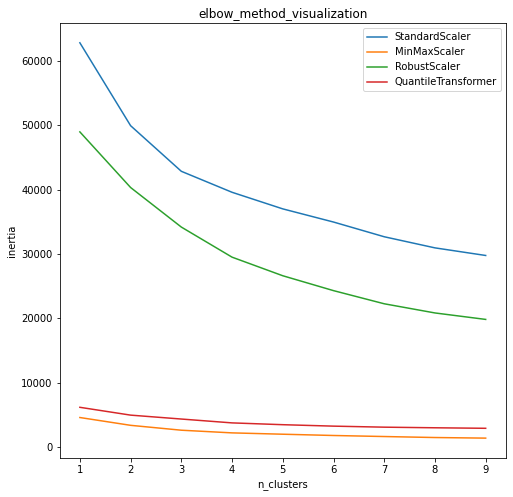

In [58]:
from IPython.core.pylabtools import figsize
def elbow_method_inertias(max_n_clusters, inertias, scalers):
    plt.subplots(figsize=(8,8))
    for i in range(len(scalers)):
       # plt.subplots(figsize=(6,6))
        plt.plot(range(1, max_n_clusters), inertias[i])
        #plt.plot(x=range(1,max_n_clusters), y=inertia)
    plt.title("elbow_method_visualization")
    plt.xlabel("n_clusters")
    plt.ylabel("inertia")
    plt.legend(str(scalers[i]).strip('()'))
    
    labels = []
    for scaler in scalers:
        labels.append(str(scaler).strip('()'))
    plt.legend(labels)
    plt.show()
elbow_method_inertias(10,inertias, scalers)

In [113]:
#This returns number of songs in each cluster together with totals songs
# and data frame of  updated dataset and cetroids
def selective_songs(max_n_cluster, df, features, num_songs, distance):
    # ciel_nums =num_songs#  int(np.ceil(num_songs/max_n_cluster))
    #df=df[features]
    df_f=df[features]
    df_norm=MinMaxScaler().fit_transform(df_f)
    kmeans=KMeans(n_clusters=4)
    kmeans.fit(df_norm)
    cl_pos= pd.DataFrame(kmeans.cluster_centers_)
    cl_pos.columns=df_f.columns
    df_f['cluster']=kmeans.labels_
    df['cluster']=kmeans.labels_
    cl_pos['cluster']= cl_pos.index
    dists=[]
    for i in range(df_f.shape[0]):
        cent = int(df_f.iloc[i]['cluster'])
        if distance == 'euclidean':
            dists.append(np.sqrt(  sum([a**2 for a in (df_f.iloc[i]-cl_pos.iloc[cent])] )))
        else:
            dists.append(np.sqrt(  sum([abs(a) for a in (df_f.iloc[i]-cl_pos.iloc[cent])] )))

    df_f['euc_dist']=dists
    df['euc_dist']=dists
    # songs=[]
    # for i in range(max_n_cluster):
    #     df_cluster=df.sort_values('euc_dist').groupby('cluster')
    #     songs.append(df_cluster[df_cluster['cluster']==i].head(num_songs) )
    songs=df.sort_values('euc_dist').groupby('cluster').head(num_songs)
    dfs = []
    for i in range(max_n_cluster):
        dfs.append(songs[songs['cluster']==i])
    #songs = select_df[:num_songs]
    return dfs, songs,df,cl_pos

In [106]:
dfs, songs,dff, cl_pos=selective_songs(4,datas,['danceability', 'acousticness', 'energy'], 20, 'euclidean')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [112]:
dfs[1]

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,cluster,euc_dist
393,Camarera de Mi Amor ...,Antonio Machín,0.631,0.557,3,-8.932,1,0.0287,0.554,0.000004,0.0806,0.964,140.648,,101813,4,3k2KNKdvXceiVlT3P6WgVh,https://open.spotify.com/track/3k2KNKdvXceiVlT...,1,0.029916
36,Mariana ...,Seu Jorge,0.617,0.526,9,-10.638,0,0.0376,0.538,0.389000,0.1050,0.931,167.706,,275853,4,2BkIiZYOniMrWBBlADyVNX,https://open.spotify.com/track/2BkIiZYOniMrWBB...,1,0.034851
432,Bromes ...,Les Sueques,0.641,0.501,1,-9.333,1,0.0226,0.589,0.062500,0.3350,0.935,92.188,,156430,4,5E2ivmmWqJINn0716sYc4c,https://open.spotify.com/track/5E2ivmmWqJINn07...,1,0.038564
1051,Hard to Handle ...,Otis Redding,0.666,0.550,10,-8.672,1,0.0612,0.573,0.000002,0.1220,0.961,95.552,,141000,4,7FXuCkl1kfxwS5icDjTwbM,https://open.spotify.com/track/7FXuCkl1kfxwS5i...,1,0.042052
1177,Jolene ...,Dolly Parton,0.674,0.537,1,-10.971,0,0.0363,0.566,0.000000,0.1310,0.809,110.578,,161533,4,2SpEHTbUuebeLkgs9QB7Ue,https://open.spotify.com/track/2SpEHTbUuebeLkg...,1,0.046491
1089,Maggie May ...,Rod Stewart,0.605,0.574,2,-10.536,1,0.0377,0.559,0.113000,0.0684,0.543,129.449,,350267,4,6rovOdp3HgK1DeAMYDzoA7,https://open.spotify.com/track/6rovOdp3HgK1DeA...,1,0.049042
216,Animal Salvatge ...,Sanjosex,0.617,0.517,7,-10.490,1,0.0262,0.627,0.000207,0.1580,0.590,141.317,,220600,4,0PnFxSp2D1zDZdWgFXrY1i,https://open.spotify.com/track/0PnFxSp2D1zDZdW...,1,0.059546
927,Little Darlin' ...,The Diamonds,0.631,0.587,6,-11.402,1,0.0420,0.536,0.290000,0.3330,0.664,152.851,,129333,4,7ycFNferNuk6wAjBa0vWvl,https://open.spotify.com/track/7ycFNferNuk6wAj...,1,0.064801
1109,Big Yellow Taxi ...,Joni Mitchell,0.611,0.470,4,-9.135,1,0.0356,0.579,0.000000,0.5810,0.970,85.527,,134800,4,6UkMcAA19lTdjs22jtB7o2,https://open.spotify.com/track/6UkMcAA19lTdjs2...,1,0.065055
172,Alma Não Tem Cor ...,Perotá Chingó,0.648,0.477,7,-6.834,1,0.2310,0.601,0.000000,0.0450,0.372,80.730,,244114,4,2Dh6lSAFh1LWYeoMkDe2TS,https://open.spotify.com/track/2Dh6lSAFh1LWYeo...,1,0.066193


In [114]:
dfs[0]

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,cluster,euc_dist
2885,Dancin (feat. Luvli) - Krono Remix ...,Aaron Smith,0.720,0.741,10,-6.529,0,0.0287,0.1010,0.000014,0.2890,0.357,119.896,,198053,4,6WkJ2OK163XXS2oARUC9JM,https://open.spotify.com/track/6WkJ2OK163XXS2o...,0,0.010183
1497,Life ...,Des'ree,0.721,0.740,1,-5.453,1,0.0416,0.1120,0.000041,0.0848,0.714,104.815,,216040,4,5LGqFIVBf3ZUeFBpc87CFS,https://open.spotify.com/track/5LGqFIVBf3ZUeFB...,0,0.017175
1086,Ain't No Stoppin' Us Now - Single Version ...,McFadden & Whitehead,0.721,0.743,1,-6.358,1,0.0525,0.0835,0.000000,0.1350,0.867,112.504,,217320,4,18piene9mIdOJA2dura9LH,https://open.spotify.com/track/18piene9mIdOJA2...,0,0.018559
3183,Sensacion Del Bloque ...,De La Ghetto,0.709,0.726,7,-7.129,1,0.0411,0.0977,0.000000,0.3010,0.404,92.006,,182187,4,5clFSlfkCRlhnH1cAQjSBi,https://open.spotify.com/track/5clFSlfkCRlhnH1...,0,0.020899
3333,Te Iré a Buscar ...,Farruko,0.735,0.742,6,-5.865,1,0.0474,0.0948,0.000000,0.1770,0.964,174.025,,183197,4,4UPeS038Mxup1H4bl0PsS8,https://open.spotify.com/track/4UPeS038Mxup1H4...,0,0.024119
3193,Agárrala - Remix ...,Trebol Clan,0.731,0.741,9,-7.978,0,0.0418,0.0812,0.024500,0.0993,0.862,96.031,,152107,4,43yyvWNjl3yWpghcrxZYkr,https://open.spotify.com/track/43yyvWNjl3yWpgh...,0,0.026937
2950,Something Just Like This - Don Diablo Remix ...,The Chainsmokers,0.720,0.746,11,-5.567,0,0.0983,0.1250,0.000476,0.0929,0.511,124.039,,230853,4,15MTd64KUMG7CF6mOyovsQ,https://open.spotify.com/track/15MTd64KUMG7CF6...,0,0.027134
4881,OMG! ...,Marteria,0.691,0.748,2,-6.224,1,0.0675,0.0773,0.000000,0.1810,0.509,80.999,,230480,4,5PcbCAQ0jQpr2xuRknr22B,https://open.spotify.com/track/5PcbCAQ0jQpr2xu...,0,0.030165
4711,Willst Du mit mir gehn ...,Nena,0.743,0.746,11,-5.081,0,0.0337,0.1090,0.003130,0.1530,0.438,129.968,,223946,4,6DeeuVdUbSSvLI9jyfGhX3,https://open.spotify.com/track/6DeeuVdUbSSvLI9...,0,0.032776
1185,You Make Me Feel Like Dancing - Remastered ...,Leo Sayer,0.728,0.718,8,-5.281,0,0.0501,0.0848,0.000000,0.0579,0.733,95.922,,219467,4,6gTrbqZnyljwXdYQTyBkSx,https://open.spotify.com/track/6gTrbqZnyljwXdY...,0,0.035949


In [116]:
#for cluster 1
dff[dff['cluster']==1].sort_values('euc_dist').head(5)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,cluster,euc_dist
393,Camarera de Mi Amor ...,Antonio Machín,0.631,0.557,3,-8.932,1,0.0287,0.554,0.000004,0.0806,0.964,140.648,,101813,4,3k2KNKdvXceiVlT3P6WgVh,https://open.spotify.com/track/3k2KNKdvXceiVlT...,1,0.029916
36,Mariana ...,Seu Jorge,0.617,0.526,9,-10.638,0,0.0376,0.538,0.389000,0.1050,0.931,167.706,,275853,4,2BkIiZYOniMrWBBlADyVNX,https://open.spotify.com/track/2BkIiZYOniMrWBB...,1,0.034851
432,Bromes ...,Les Sueques,0.641,0.501,1,-9.333,1,0.0226,0.589,0.062500,0.3350,0.935,92.188,,156430,4,5E2ivmmWqJINn0716sYc4c,https://open.spotify.com/track/5E2ivmmWqJINn07...,1,0.038564
1051,Hard to Handle ...,Otis Redding,0.666,0.550,10,-8.672,1,0.0612,0.573,0.000002,0.1220,0.961,95.552,,141000,4,7FXuCkl1kfxwS5icDjTwbM,https://open.spotify.com/track/7FXuCkl1kfxwS5i...,1,0.042052
1177,Jolene ...,Dolly Parton,0.674,0.537,1,-10.971,0,0.0363,0.566,0.000000,0.1310,0.809,110.578,,161533,4,2SpEHTbUuebeLkgs9QB7Ue,https://open.spotify.com/track/2SpEHTbUuebeLkg...,1,0.046491
